<a href="https://colab.research.google.com/github/stellarboymihir/ML_now2.0/blob/main/03_LinearRegression/3a_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> This notebook was created for code illustration of the `ML.now()` course


`Univariate Linear Regression`

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

**Date Created**: June 12, 2021


**Author**:
 Mihir Bhadange



## Setup

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
cd '/content/drive/MyDrive/Courses/ML.now()/CodeArchive/student'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Courses/ML.now()/CodeArchive/student'
/content


In [51]:
ls

drive/  sample_data/  univariate_MathData_2.csv


In [52]:
import os

In [53]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [54]:
mathData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Gs script/student-mat.csv', sep=';') #load the csv file as dataframe

In [55]:
mathData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


We are just going to consider the columns `G1` and `G3` for univariate linear regression

$G3_i = G1_i  \cdot \theta_1 + \theta_0$

In [56]:
uniMathData = mathData[['G1', 'G3']]
uniMathData.head(5)

,G1,G3
0,5,6
1,5,6
2,7,10
3,15,15
4,6,10


In [57]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [58]:
ls

drive/  sample_data/  univariate_MathData_2.csv


## Data visualization

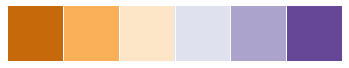

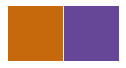

In [59]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [60]:
uniMathData.columns #columns in the dataframe

Index(['G1', 'G3'], dtype='object')

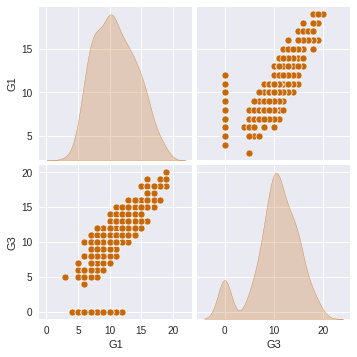

In [61]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['G1', 'G3'],
             y_vars =  ['G1', 'G3'],
       diag_kind='kde'
             )

## Data Splits

In [62]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [63]:
print(trainDataset.shape)
print(testDataset.shape)

(316, 2)
(79, 2)


In [64]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     G1  G3
329  14  14
318  11  10
317   9   9
65   16  15
59   15  16
    G1  G3
9   14  15
25   6   8
28  11  11
31  17  17
32  17  16


In [65]:
#removing the G3 column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

329    14
318    10
317     9
65     15
59     16
Name: G3, dtype: int64
9     15
25     8
28    11
31    17
32    16
Name: G3, dtype: int64


In [66]:
print(trainFeatures.head())
print(testFeatures.head())

     G1
329  14
318  11
317   9
65   16
59   15
    G1
9   14
25   6
28  11
31  17
32  17


In [67]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [68]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [69]:
numEpochs = 300
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/300
10/10 [==============================] - 0s 16ms/step - loss: 20.1892 - mae: 20.1892 - mse: 459.1201 - val_loss: 21.3187 - val_mae: 21.3187 - val_mse: 509.7487
Epoch 2/300
10/10 [==============================] - 0s 3ms/step - loss: 20.0712 - mae: 20.0712 - mse: 453.9302 - val_loss: 21.1945 - val_mae: 21.1945 - val_mse: 503.9893
Epoch 3/300
10/10 [==============================] - 0s 4ms/step - loss: 19.9540 - mae: 19.9540 - mse: 448.8103 - val_loss: 21.0700 - val_mae: 21.0700 - val_mse: 498.2490
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 19.8360 - mae: 19.8360 - mse: 443.6498 - val_loss: 20.9457 - val_mae: 20.9457 - val_mse: 492.5514
Epoch 5/300
10/10 [==============================] - 0s 3ms/step - loss: 19.7180 - mae: 19.7180 - mse: 438.5046 - val_loss: 20.8214 - val_mae: 20.8214 - val_mse: 486.8865
Epoch 6/300
10/10 [==============================] - 0s 3ms/step - loss: 19.6014 - mae: 19.6014 - mse: 433.6024 - val_loss: 20.6962 - val_mae: 2

In [70]:
print(history)

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


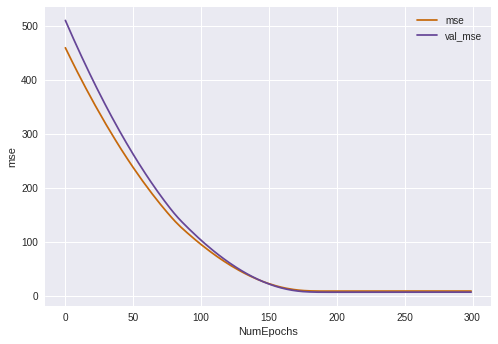

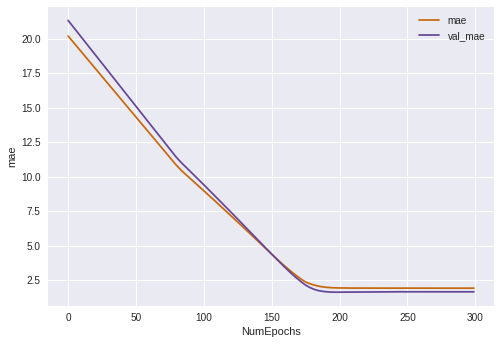

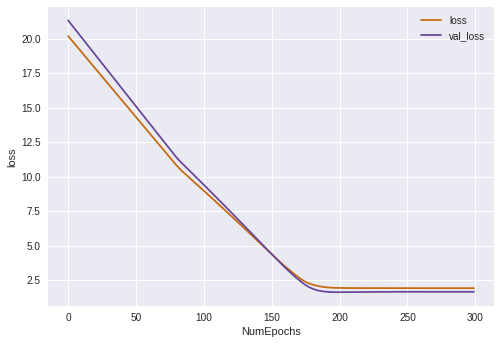

In [72]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [73]:
model.predict([1])

array([[2.5073571]], dtype=float32)

In [74]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.5073571]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.5073571]
 [3.369841 ]
 [4.2323246]
 [5.0948086]
 [5.9572926]]

List of Predictions (flattened out):
[2.5073571 3.369841  4.2323246 5.0948086 5.9572926]



In [75]:
print(testFeatures)

     G1
9    14
25    6
28   11
31   17
32   17
..   ..
365  10
367   7
379  10
381   7
393  11

[79 rows x 1 columns]


In [76]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [77]:
print(len(testPreds))
print(testPreds)

79
[13.719648   6.8197765 11.132196  16.3071    16.3071    11.99468
 13.719648  18.032066  18.032066   8.5447445 13.719648  12.857164
  8.5447445  7.6822605  9.407228  12.857164  11.132196  15.444616
  7.6822605 10.269712  14.582132  12.857164  13.719648  15.444616
  7.6822605  7.6822605  8.5447445 10.269712  11.99468   10.269712
 11.99468   12.857164  10.269712   6.8197765  9.407228  11.99468
  7.6822605  8.5447445 13.719648   9.407228   9.407228   7.6822605
 11.99468    6.8197765 12.857164   7.6822605  7.6822605 11.132196
 12.857164  16.3071    11.99468   14.582132   9.407228  11.99468
 14.582132  11.99468   14.582132  11.99468   14.582132  11.132196
 11.99468    8.5447445 15.444616   7.6822605 15.444616  11.132196
 15.444616  12.857164   8.5447445  8.5447445 11.99468   17.169584
 12.857164  15.444616  10.269712   7.6822605 10.269712   7.6822605
 11.132196 ]


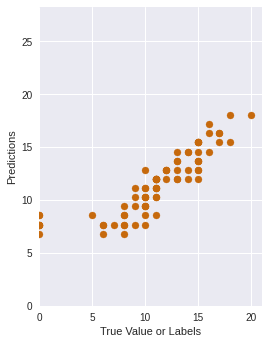

In [78]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

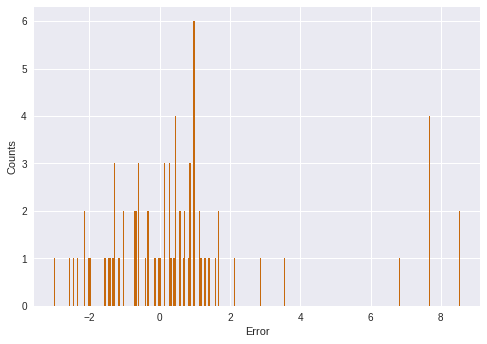

In [79]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions